In [1]:
# voting classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.datasets import make_moons
(X_train, y_train) = make_moons(n_samples=1000)
(X_test, y_test) = make_moons(n_samples=100)

In [4]:
log_clf = LogisticRegression()
rand_clf = RandomForestClassifier()
svc_clf = SVC()

In [5]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rand_clf), ('svc', svc_clf)],
    voting='hard')

In [6]:
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("score", accuracy_score(y_pred, y_test))

('score', 1.0)


In [7]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rand_clf, svc_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

('LogisticRegression', 0.88)
('RandomForestClassifier', 1.0)
('SVC', 1.0)


In [8]:
# bagging and pasting method
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
# out of bag score
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, max_samples=100,
                            bootstrap=500, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=500, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [10]:
bag_clf.oob_score_

0.98999999999999999

In [11]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.97999999999999998

In [2]:
#bag_clf.oob_decision_function_

In [15]:
# Random Forest
from sklearn.ensemble import *
rand_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rand_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.97999999999999998

In [19]:
from sklearn.tree import *
extra_tree_classifier = ExtraTreeClassifier()
extra_tree_classifier.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.97999999999999998

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

('sepal length (cm)', 0.087041585845614458)
('sepal width (cm)', 0.021351321112384566)
('petal length (cm)', 0.43940731656349674)
('petal width (cm)', 0.45219977647850429)


In [9]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                            algorithm="SAMME.R", learning_rate=0.5)
from sklearn.datasets import make_moons
(X_train, y_train) = make_moons(n_samples=1000)
(X_test, y_test) = make_moons(n_samples=100)
ada_clf.fit(X_train, y_train)
y_predict = ada_clf.predict(X_test)

In [13]:
y_predict

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0])

In [14]:
y_test

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0])

In [15]:
#GBRT
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
plot(X_train, y_train)

In [23]:
# model selection
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingRegressor
(X, y) = make_moons(n_samples=10000)
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
erros = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(erros)
gbrt_test = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_test.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=119, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

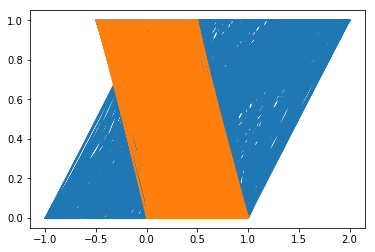

In [18]:
%matplotlib inline

In [24]:
# implement early stopping
min_error = 0.0
max_stopping_iter = 5
stopping_iter = 0
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=1)
for n_val_estimators in range(1, 120):
    gbrt.n_estimators = n_val_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    if error < min_error:
        min_error = error
        stopping_iter = 0
    else:
        stopping_iter = stopping_iter + 1
        if stopping_iter == max_stopping_iter:
            break
gbrt

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)